In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import datetime as dt

In [35]:
customer = pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv") 
spend = pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 2 - Credit Card Case Study\spend.csv") 
repay = pd.read_csv(r"C:\Users\Keshav\Desktop\PG CERT DS\Term 2\0CASE STUDY\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [36]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [37]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [38]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


# 1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

In [39]:
customer['Age'].mean()

46.49

In [40]:
#replacing age less than 18 with mean of age values
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [41]:
new_mean=customer['Age'].mean()

In [42]:
print("The new mean of Age column is",new_mean)

The new mean of Age column is 48.39940000000001


b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [43]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [44]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [48]:
#merging customer and spend table on the basis of "Customer" column
customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")

In [47]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13


In [49]:
#all the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,118,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,132,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,146,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,160,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,89,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [50]:
#if customer's spend amount is more than the limit,replacing with 50% of that customer’s limit
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [51]:
#there are no customers left whose spend amount is more than the limit
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [52]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [53]:
repay.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN


In [54]:

#merging customer and spend table on the basis of "Customer" column
customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [55]:
customer_repay 

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,3-Dec-05,429700.12,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,344628.72,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,336264.37,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [56]:
#all the customers where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
18,8.0,A8,5-Feb-04,156913.59,NaN,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,110.0,A8,12-Jan-04,350999.98,NaN,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,124.0,A8,31-Mar-06,155642.95,NaN,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,138.0,A8,9-May-05,145457.38,NaN,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,152.0,A8,8-May-06,361184.89,NaN,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,259.0,A7,6-May-06,400375.97,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,3-Dec-05,429700.12,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,344628.72,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,336264.37,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [57]:
#customers where repayment amount is more than the limit, replacing the repayment with the limit.
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [58]:
#there are no customers left where repayment amount is more than the limit.
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment


# 2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [61]:
distinct_customers = customer["Customer"].nunique()

In [62]:
distinct_customers 

100

b. How many distinct categories exist?

In [63]:
#customers from different segments
customer["Segment"].value_counts()


Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

In [64]:
#customers from different segments
customer["Segment"].nunique()

5

c. What is the average monthly spend by customers?

In [65]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [67]:
# Converting Month column of "spend" table to date time format
spend['Month'] = pd.to_datetime(spend['Month'],format='mixed')

In [68]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.8


In [69]:
#creating new columns which show "Month" and "Year"
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [70]:
spend.head(1)

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.8,January,2004


In [72]:
# Grouping the dataset based on 'Yearly' and 'monthly'
customer_spend_group= round(spend.groupby(['Yearly','Monthly'])['Amount'].mean(),2).reset_index()

In [73]:
customer_spend_group

,Yearly,Monthly,Amount
0,2004,April,235272.04
1,2004,February,221215.27
2,2004,January,251712.07
3,2004,March,232146.12
4,2004,May,217539.24
5,2004,November,270486.40
6,2004,September,310923.38
7,2005,April,252181.33
8,2005,August,233734.63
9,2005,December,147503.06


d. What is the average monthly repayment by customers?

In [74]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [76]:
# Converting "Month" column to date time format
repay["Month"] = pd.to_datetime(repay["Month"],format = 'mixed')

In [77]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,2004-01-12,495414.75,NaN
1,2.0,A1,2004-01-03,245899.02,NaN


In [79]:
# Creating new columns which shows "Month" and "Year"
repay['Monthly']=repay.Month.dt.strftime('%B')
repay['Yearly']=repay.Month.dt.strftime('%Y')

In [81]:
# Average Monthly repayment by customers
repay.groupby('Monthly')['Amount'].mean().reset_index()
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,NaN,January,2004
1,2.0,A1,2004-01-03,245899.02,NaN,January,2004
2,3.0,A1,2004-01-15,259490.06,NaN,January,2004
3,4.0,A1,2004-01-25,437555.12,NaN,January,2004
4,5.0,A1,2005-01-17,165972.88,NaN,January,2005


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [83]:
# Merging all the three tables. Using "customer_spend" and "repay"
# Final "customer_spend_repay" table
customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")

In [84]:
customer_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Unnamed: 4,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,2004-01-12,495414.75,NaN,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,NaN,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,NaN,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,NaN,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,NaN,January,2005


In [86]:
# Renaming
customer_spend_repay.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)

In [87]:
customer_spend_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,Unnamed: 4,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,2004-01-12,495414.75,NaN,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,NaN,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,NaN,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,2004-01-25,437555.12,NaN,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,2005-01-17,165972.88,NaN,January,2005


In [88]:
# grouping the data based on "Yearly","Month_x" columns to get the 'Spend_Amount' and 'Repay_Amount'
interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])[['Spend_Amount','Repay_Amount']].sum()

In [89]:
interest_group

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

f. What are the top 5 product types?

In [92]:
#top 5 product types
spend['Type'].value_counts().head()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

g. Which city is having maximum spend?

In [96]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

In [97]:
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

h. Which age group is spending more money?

In [100]:
#creating new column "Age Group" with 8 bins between 18 to 88 
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [101]:
customer_spend.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).reset_index()


# Customers from the Ages 42 to 50 are spending the most amount of money.

,Age Group,Amount
0,42-50,53242390.70
1,34-42,38037826.50
2,26-34,30553459.81
3,18-26,25233896.65
4,50-58,22454066.68
5,74-82,19770884.32
6,66-74,17705877.44
7,58-66,12782683.13


i. Who are the top 10 customers in terms of repayment?

In [102]:
#grouping based on "Customer" column to find top 10 customers
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
representation for the same.

In [103]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,74-82
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,74-82
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,74-82
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,74-82
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,74-82


In [106]:
#converting "Month" column to date time 
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"],format='mixed')

In [107]:
#creating new column "year" 
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [108]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004


In [109]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

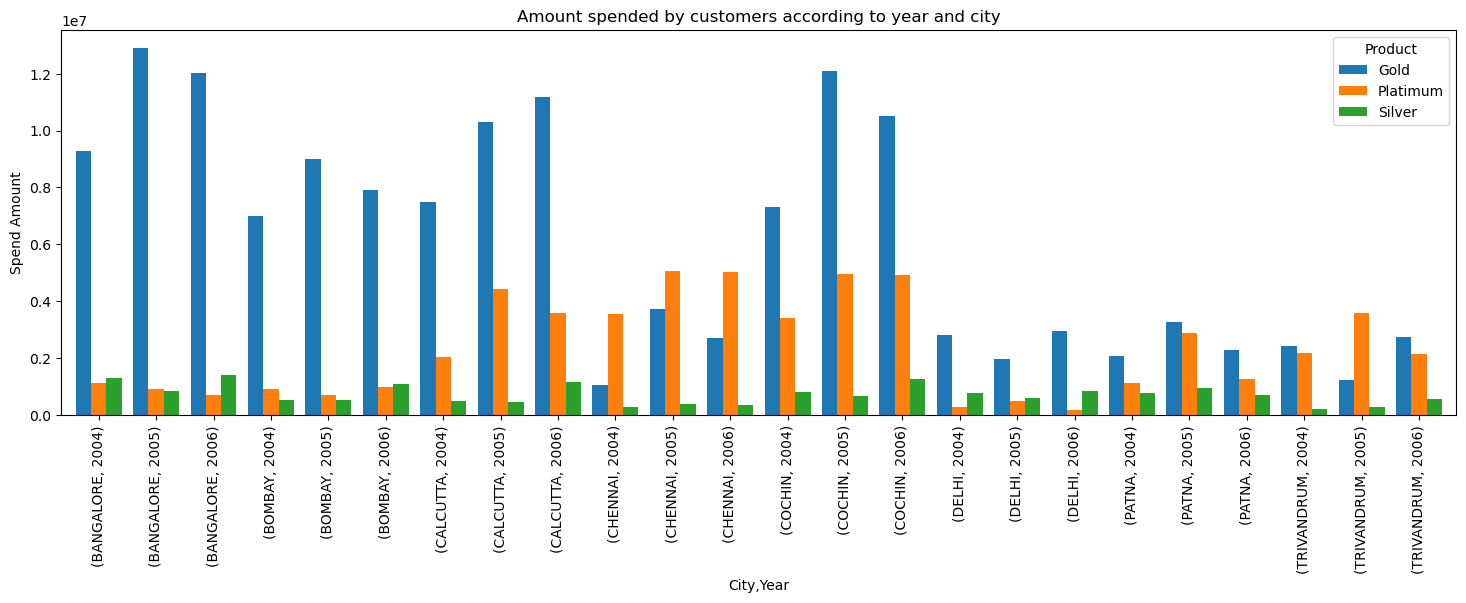

In [110]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

4. Create graphs for

a. Monthly comparison of total spends, city wise

In [111]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005


In [112]:
# created new column "Monthly" 
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

In [113]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age Group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-82,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-82,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-82,2005,January


In [114]:
#grouping data based on "Monthly" and "City" columns
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

In [115]:
#creating pivot table based on "Monthly" and "City" columns
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


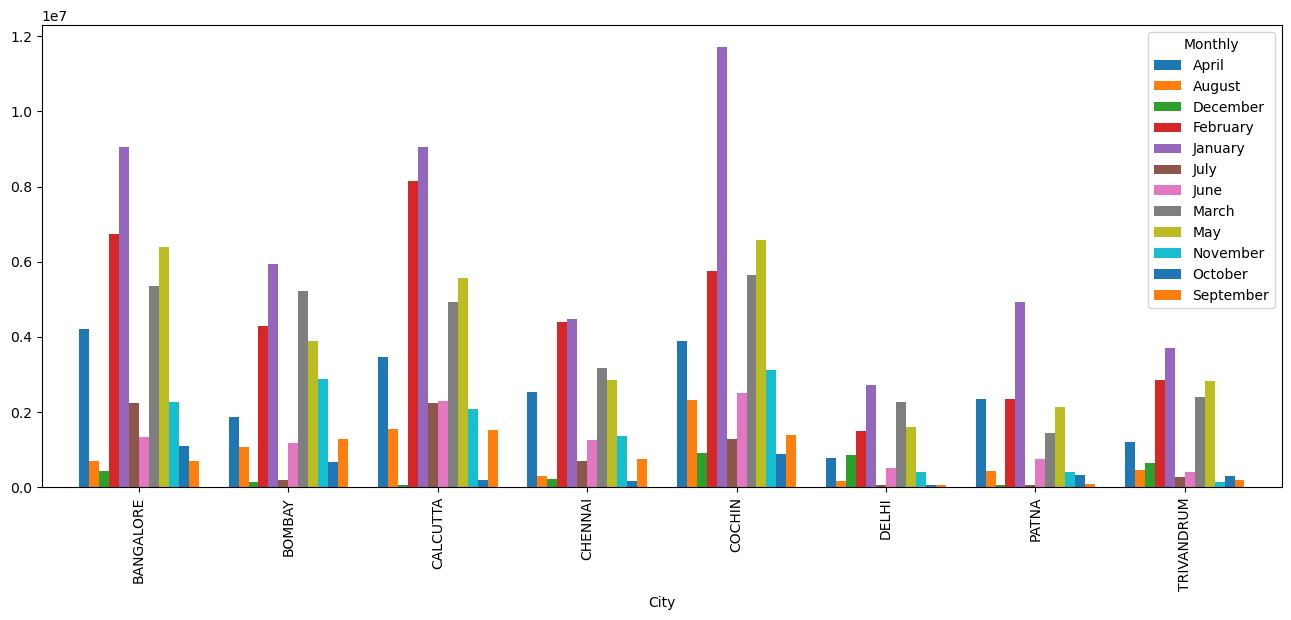

In [116]:
month_city.plot(kind="bar",figsize=(16,6),width=0.8)
plt.show()

b. Comparison of yearly spend on air tickets

In [117]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()

In [120]:
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


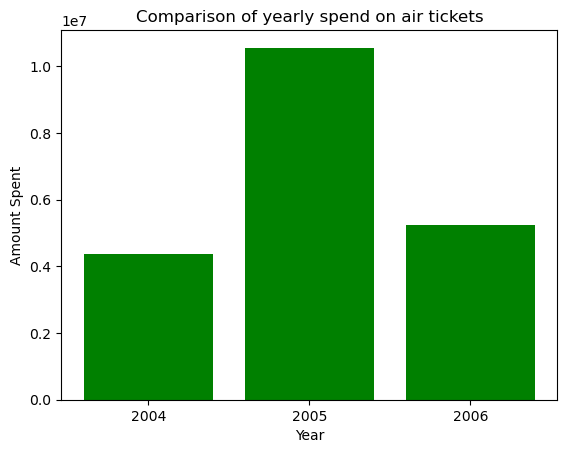

In [121]:
plt.bar(filtered["Year"],height=air_tickets1["Amount"],color="g")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

In [122]:
#creating pivot table based on "Monthly" and "Product" columns
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


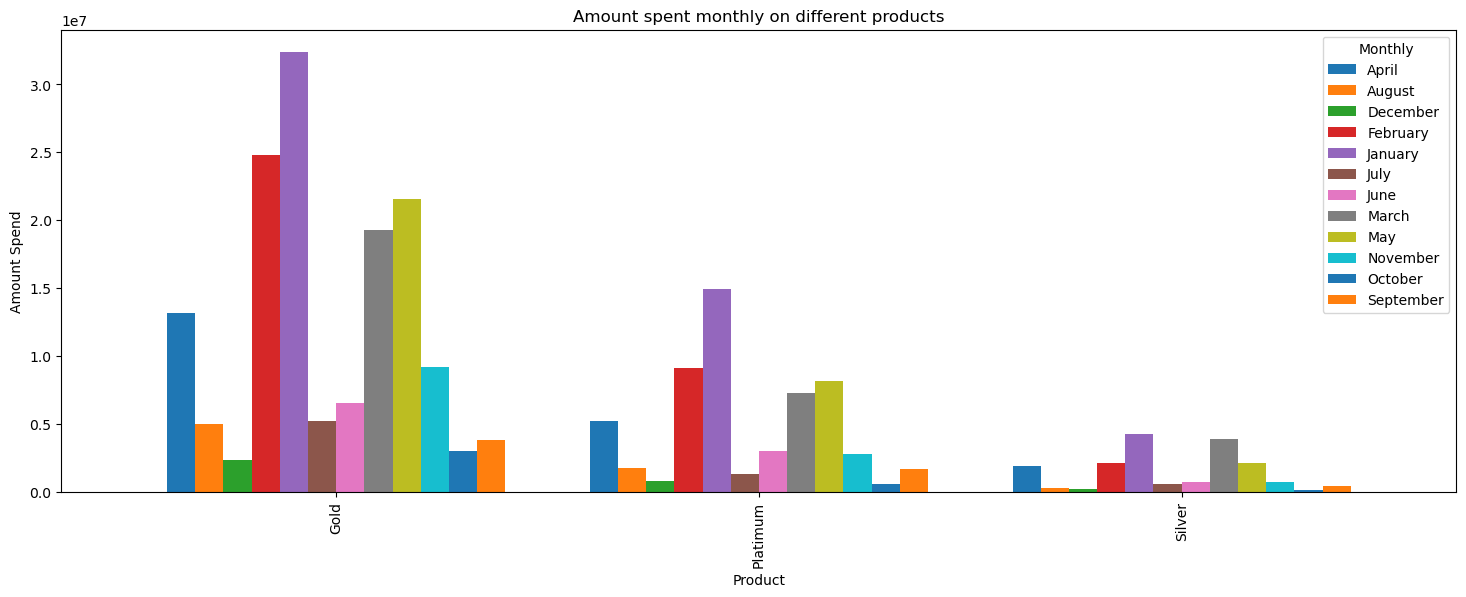

In [123]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

In [124]:
print('Out of these months,highest sales are in January')

Out of these months,highest sales are in January


5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [125]:
# converting 'Month' column to date time format
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'],format='mixed')

In [126]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [127]:
customer_repay.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004


In [128]:

# Write user-defined Python function for analysis
def top_10_customers_by_criteria(spend, customer, Type, time_period):
    merged_data = spend.merge(customer[['Customer', 'City']], on='Customer', how='left')

    if time_period.lower() == 'yearly':
        merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year
        aggregated_data = merged_data.groupby(['City', 'Customer', 'Type', 'Year'])['Amount'].sum().reset_index()
    elif time_period.lower() == 'monthly':
        merged_data['Month'] = pd.to_datetime(merged_data['Month']).dt.month
        aggregated_data = merged_data.groupby(['City', 'Customer', 'Type', 'Month'])['Amount'].sum().reset_index()

    top_10 = aggregated_data[aggregated_data['Type'] == Type].groupby('City', group_keys=False).apply(lambda x: x.nlargest(10, 'Amount'))
    return top_10

# Example usage
top_10_customers_result = top_10_customers_by_criteria(spend, customer, 'Gold', 'Yearly')
print("Top 10 customers for Gold product on a yearly basis:", top_10_customers_result)

Top 10 customers for Gold product on a yearly basis: Empty DataFrame
Columns: [City, Customer, Type, Year, Amount]
Index: []


In [129]:
merged_data = spend.merge(customer[['Customer', 'City']], on='Customer', how='left')
merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year
merged_data.groupby(['City', 'Customer', 'Type', 'Year'])['Amount'].sum().reset_index()

,City,Customer,Type,Year,Amount
0,BANGALORE,A1,AIR TICKET,2006,346925.68
1,BANGALORE,A1,BUS TICKET,2004,413349.96
2,BANGALORE,A1,CAMERA,2005,369694.07
3,BANGALORE,A1,CAR,2005,23370.20
4,BANGALORE,A1,CLOTHES,2004,23740.46
...,...,...,...,...,...
1059,TRIVANDRUM,A57,TRAIN TICKET,2004,245152.21
1060,TRIVANDRUM,A68,BUS TICKET,2006,204971.10
1061,TRIVANDRUM,A68,SHOPPING,2004,9665.48
1062,TRIVANDRUM,A86,TRAIN TICKET,2006,166438.62


In [130]:
print(top_10_customers_result)

Empty DataFrame
Columns: [City, Customer, Type, Year, Amount]
Index: []


In [131]:
print(spend['Type'].unique())
print(spend['Yearly'].unique())

['JEWELLERY' 'PETRO' 'CLOTHES' 'FOOD' 'CAMERA' 'SANDALS' 'CAR' 'BIKE'
 'AUTO' 'SHOPPING' 'AIR TICKET' 'BUS TICKET' 'TRAIN TICKET' 'RENTAL'
 'MOVIE TICKET']
['2004' '2005' '2006']
